# West Nile Virus in Chicago: Investigation of `weather.csv`
---

## Content
---

- [Locations](../code/99_Locations.ipynb)
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb) 
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb) **Current Notebook**
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb)
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb)
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb)
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

## Import all required libraries
---

In [ ]:
# All imports go here
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
#!pip install seaborn
import seaborn as sns

## Import weather dataset

In [ ]:
weather = pd.read_csv('../assets/weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

Weather dataset essentially contains weather data from 2 stations.

In [ ]:
stn1_weather = weather.loc[weather.loc[:,'Station']==1,:].reset_index(drop=True)
print(stn1_weather.shape)
stn2_weather = weather.loc[weather.loc[:,'Station']==2,:].reset_index(drop=True)
print(stn2_weather.shape)

(1472, 22)
(1472, 22)


In [ ]:
stn1_weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
5,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0
6,1,2007-05-07,83,47,65,10,41,54,0,0,...,RA,0,M,0.0,T,29.38,30.12,8.6,18,10.5
7,1,2007-05-08,82,54,68,12,58,62,0,3,...,BR,0,M,0.0,0.00,29.29,30.03,2.7,11,5.8
8,1,2007-05-09,77,61,69,13,59,63,0,4,...,BR HZ,0,M,0.0,0.13,29.21,29.94,3.9,9,6.2
9,1,2007-05-10,84,56,70,14,52,60,0,5,...,BR,0,M,0.0,0.00,29.20,29.92,0.7,17,4.1


In [ ]:
stn2_weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
3,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
4,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5
5,2,2007-05-06,68,52,60,M,30,46,5,0,...,,M,M,M,0.00,29.62,30.28,13.8,10,14.5
6,2,2007-05-07,84,50,67,M,39,53,0,2,...,,M,M,M,0.00,29.44,30.12,8.5,17,9.9
7,2,2007-05-08,80,60,70,M,57,63,0,5,...,HZ,M,M,M,T,29.36,30.02,2.5,8,5.4
8,2,2007-05-09,76,63,70,M,60,63,0,5,...,BR HZ,M,M,M,0.02,29.28,29.93,3.9,7,5.9
9,2,2007-05-10,83,59,71,M,52,61,0,6,...,BR HZ,M,M,M,0.00,29.26,29.91,2.0,9,3.9


## Inspect date column for duplicates and gaps

In [ ]:
stn1_dates_series = pd.Series(stn1_weather.loc[:,'Date'].value_counts().sort_values(ascending=False))
print('Duplicate dates present in stn1: {}'.format(len(stn1_dates_series[stn1_dates_series>1]) > 0))

stn2_dates_series = pd.Series(stn2_weather.loc[:,'Date'].value_counts().sort_values(ascending=False))
print('Duplicate dates present in stn2: {}'.format(len(stn2_dates_series[stn1_dates_series>1]) > 0))

Duplicate dates present in stn1: False
Duplicate dates present in stn2: False


In [ ]:
stn1_weather.loc[:,'Date'] = pd.to_datetime(stn1_weather.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
stn2_weather.loc[:,'Date'] = pd.to_datetime(stn2_weather.loc[:,'Date'], format='%Y-%m-%d', errors='raise')

stn1_weather.sort_values(by='Date', inplace=True)
stn2_weather.sort_values(by='Date', inplace=True)

In [ ]:
# helper function to check if there are gaps in a given date range
def check_date_list_no_gap(full_date_series):
    first_date = full_date_series.min() # get first date
    calculated_last_date = first_date + datetime.timedelta(days=len(full_date_series)-1) # calculate last date based on timedelta in days based on series length
    actual_last_date = full_date_series.max() # get actual last date
    print('Calculated last date: {}'.format(calculated_last_date))
    print('Actual last date: {}'.format(actual_last_date))
    return (calculated_last_date == actual_last_date)

In [ ]:
print(check_date_list_no_gap(stn1_weather.loc[:,'Date']))
print(check_date_list_no_gap(stn2_weather.loc[:,'Date']))

Calculated last date: 2011-05-11 00:00:00
Actual last date: 2014-10-31 00:00:00
False
Calculated last date: 2011-05-11 00:00:00
Actual last date: 2014-10-31 00:00:00
False


Gaps are timeframe have been detected for weather data in both stations, indicating that weather records are not being consistently collected throughout the year.

## Check `Tavg` for abnormal parsing

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Tavg'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Tavg'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
3,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
252,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
337,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
818,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
1033,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
1105,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
1250,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
1255,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
1262,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
1289,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [ ]:
# isolated the index values of the 11 record with bad Tavg value
bad_tavg_index_list = stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Tavg'], errors='coerce').isnull(),:].index

# For those 11 records, take mean of Tmax and Tmin, then round off the result and assign back to Tavg
stn2_weather.loc[bad_tavg_index_list, 'Tavg'] = stn2_weather.loc[bad_tavg_index_list, ['Tmax','Tmin']].mean(axis=1).round()
stn2_weather.loc[bad_tavg_index_list, ['Tmax','Tmin','Tavg']]

,Tmax,Tmin,Tavg
3,78,51,64
252,86,46,66
337,62,46,54
818,100,71,86
1033,84,72,78
1105,71,42,56
1250,91,52,72
1255,84,53,68
1262,76,48,62
1289,80,47,64


In [ ]:
stn1_weather.loc[:,'Tavg'] = stn1_weather.loc[:,'Tavg'].astype('int64')
stn2_weather.loc[:,'Tavg'] = stn2_weather.loc[:,'Tavg'].astype('int64')

In [ ]:
stn1_weather.loc[:,'Date'].head(10)

0   2007-05-01
1   2007-05-02
2   2007-05-03
3   2007-05-04
4   2007-05-05
5   2007-05-06
6   2007-05-07
7   2007-05-08
8   2007-05-09
9   2007-05-10
Name: Date, dtype: datetime64[ns]

In [ ]:
stn1_weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [ ]:
stn2_weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


## Check `Depart` for abnormal parsing

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Depart'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Depart'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
3,2,2007-05-04,78,51,64,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
4,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2,2014-10-27,79,54,67,M,52,59,0,2,...,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
1468,2,2014-10-28,66,48,57,M,40,48,8,0,...,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
1469,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
1470,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


Definition of `Depart` ([Source](https://w2.weather.gov/climate/f6.php)):

*Departure from normal. The difference between column 4 and the 30 year normal temperature for this date. A minus (-) is number of degrees below normal. A zero (0) indicates that the average for that day was the Normal.*


This column basically gives a numerical deviation of the current date average temperature from the 30-year average of the same date.

Both stations are 15.5 miles apart and should be logical to assume that the 30-year average temperature readings of both stations to be approximately the same, so we allow `Depart` values of Station 2 to take those from station 1.

In [ ]:
stn1_weather.loc[:,'Depart']

0       14
1       -3
2        2
3        4
4        5
        ..
1467    16
1468    10
1469    -4
1470    -4
1471    -6
Name: Depart, Length: 1472, dtype: object

In [ ]:
stn2_weather.loc[:,'Depart'] = stn1_weather.loc[:,'Depart']
stn2_weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2,2007-05-01,84,52,68,14,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,-3,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,2,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


In [ ]:
stn1_weather.loc[:,'Depart'] = stn1_weather.loc[:,'Depart'].astype('int64')
stn2_weather.loc[:,'Depart'] = stn2_weather.loc[:,'Depart'].astype('int64')

## Looking at `DewPoint`

In [ ]:
stn1_weather.loc[:,'DewPoint'].describe()

count    1472.000000
mean       53.377717
std        10.670263
min        22.000000
25%        46.000000
50%        54.000000
75%        61.250000
max        75.000000
Name: DewPoint, dtype: float64

In [ ]:
stn2_weather.loc[:,'DewPoint'].describe()

count    1472.000000
mean       53.538043
std        10.683121
min        23.000000
25%        46.000000
50%        55.000000
75%        62.000000
max        74.000000
Name: DewPoint, dtype: float64

`DewPoint` columns in dataset of both stations do not indicate any abnormalities.

## Check `WetBulb` for abnormal parsing

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'WetBulb'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
424,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1206,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'WetBulb'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1207,2,2013-08-12,85,69,77,2,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


Definition of `WebBulb`, a.k.a *Web Bulb Globe Temperature*:

*Wet Bulb Globe Temperature (WBGT) is a measure of the heat stress in direct sunlight, which takes into account: temperature, humidity, wind speed, sun angle and cloud cover (solar radiation).*

Index list of excluded records:


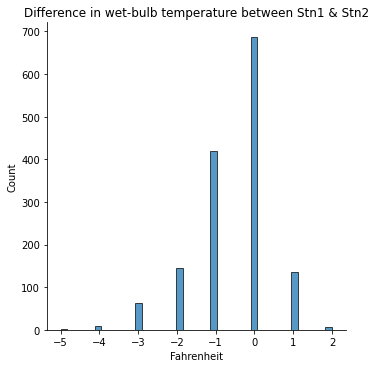

In [ ]:
# compare wet bulb temperatures between both stations where avilable, i.e. we exclude records where either station recordd 'M' on that given date
stn1_bad_wetbulb_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'WetBulb'], errors='coerce').isnull(),:].index)
stn2_bad_wetbulb_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'WetBulb'], errors='coerce').isnull(),:].index)
bad_wetbulb_index_list = np.concatenate((stn1_bad_wetbulb_index_list, stn2_bad_wetbulb_index_list), axis=0)
print('Index list of excluded records:'.format(bad_wetbulb_index_list))

wb_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in bad_wetbulb_index_list],'WetBulb'].astype('int64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in bad_wetbulb_index_list],'WetBulb'].astype('int64')

sns.displot(wb_diff)
plt.title('Difference in wet-bulb temperature between Stn1 & Stn2')
plt.xlabel('Fahrenheit')
plt.show()

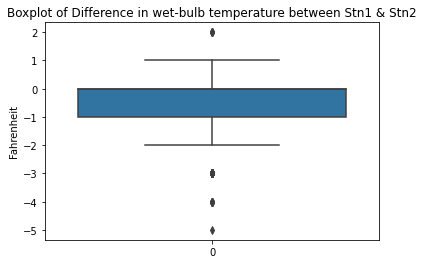

In [ ]:
sns.boxplot(data=wb_diff)
plt.title('Boxplot of Difference in wet-bulb temperature between Stn1 & Stn2')
plt.ylabel('Fahrenheit')
plt.show()

In [ ]:
avg_diff_between_stn1_and_stn2 = np.round(wb_diff.mean(), 1)
avg_diff_between_stn1_and_stn2

-0.5

Above boxplot shows that inter-quartile range of wet-bulb temperature difference ranges between 0 to -1 deg F, indicating very little difference between the wet-bulb temperatures of both stations. Hence, for dates where wet-bulb value is missing for 1 station, we fill in missing wet-bulb temperature by copying from the other station. Fortunately, we have no instances where wet-bulb temperatures were missing from both stations on a same date.

In [ ]:
stn2_weather.loc[stn1_bad_wetbulb_index_list, 'WetBulb'].astype('int64')

424     67
1205    63
1206    64
Name: WetBulb, dtype: int64

In [ ]:
stn1_weather.loc[stn1_bad_wetbulb_index_list, 'WetBulb'] = np.round(stn2_weather.loc[stn1_bad_wetbulb_index_list, 'WetBulb'].astype('int64') + avg_diff_between_stn1_and_stn2)

stn2_weather.loc[stn2_bad_wetbulb_index_list, 'WetBulb'] = np.round(stn1_weather.loc[stn2_bad_wetbulb_index_list, 'WetBulb'].astype('int64') - avg_diff_between_stn1_and_stn2)

In [ ]:
# verify stn1 records with original missing wet bulb readings
stn1_weather.loc[stn1_bad_wetbulb_index_list, 'WetBulb']

424     66
1205    62
1206    64
Name: WetBulb, dtype: object

In [ ]:
# verify stn2 records with original missing wet bulb readings
stn2_weather.loc[stn2_bad_wetbulb_index_list, 'WetBulb']

1207    68
Name: WetBulb, dtype: object

In [ ]:
# conversion to int64 columns should give no problems now
stn1_weather.loc[:,'WetBulb'] = stn1_weather.loc[:,'WetBulb'].astype('int64')
stn2_weather.loc[:,'WetBulb'] = stn2_weather.loc[:,'WetBulb'].astype('int64')

In [ ]:
stn1_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      1472 non-null   int64         
 1   Date         1472 non-null   datetime64[ns]
 2   Tmax         1472 non-null   int64         
 3   Tmin         1472 non-null   int64         
 4   Tavg         1472 non-null   int64         
 5   Depart       1472 non-null   int64         
 6   DewPoint     1472 non-null   int64         
 7   WetBulb      1472 non-null   int64         
 8   Heat         1472 non-null   object        
 9   Cool         1472 non-null   object        
 10  Sunrise      1472 non-null   object        
 11  Sunset       1472 non-null   object        
 12  CodeSum      1472 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       1472 non-null   object        
 15  SnowFall     1472 non-null   object        
 16  Precip

## Check `Heat` for abnormal parsing

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Heat'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Heat'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
3,2,2007-05-04,78,51,64,4,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
252,2,2008-07-08,86,46,66,5,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
337,2,2008-10-01,62,46,54,-4,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
818,2,2011-07-22,100,71,86,5,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
1033,2,2012-08-22,84,72,78,-1,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
1105,2,2013-05-02,71,42,56,-5,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
1250,2,2013-09-24,91,52,72,-1,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
1255,2,2013-09-29,84,53,68,1,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
1262,2,2013-10-06,76,48,62,-1,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
1289,2,2014-05-02,80,47,64,-4,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


Index list of excluded records:


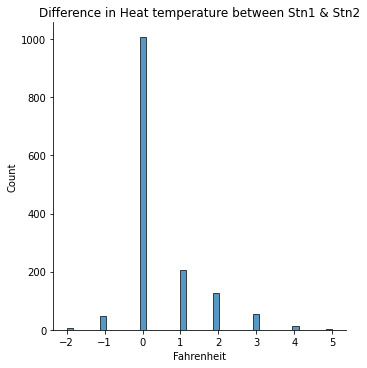

In [ ]:
# compare Heat temperatures between both stations where avilable, i.e. we exclude records where either station recordd 'M' on that given date
stn1_bad_heat_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Heat'], errors='coerce').isnull(),:].index)
stn2_bad_heat_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Heat'], errors='coerce').isnull(),:].index)
bad_heat_index_list = np.concatenate((stn1_bad_heat_index_list, stn2_bad_heat_index_list), axis=0)
print('Index list of excluded records:'.format(bad_heat_index_list))

heat_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in bad_heat_index_list],'Heat'].astype('int64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in bad_heat_index_list],'Heat'].astype('int64')

sns.displot(heat_diff)
plt.title('Difference in Heat temperature between Stn1 & Stn2')
plt.xlabel('Fahrenheit')
plt.show()

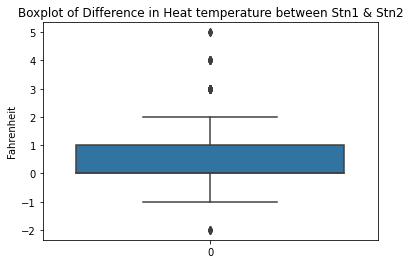

In [ ]:
sns.boxplot(data=heat_diff)
plt.title('Boxplot of Difference in Heat temperature between Stn1 & Stn2')
plt.ylabel('Fahrenheit')
plt.show()

In [ ]:
avg_heat_diff_between_stn1_and_stn2 = np.round(heat_diff.mean(), 1)
avg_heat_diff_between_stn1_and_stn2

0.4

No significant difference between Heat tempetures of both stations, though stn1 is 0.4 deg F higher than stn2 on average.

We will patch missing `Heat` values in stn2 with `Heat` values from stn1, taking into consideration the average difference as calculated above.

In [ ]:
stn1_weather.loc[stn2_bad_heat_index_list, ['Date', 'Heat']]

,Date,Heat
3,2007-05-04,7
252,2008-07-08,0
337,2008-10-01,11
818,2011-07-22,0
1033,2012-08-22,0
1105,2013-05-02,16
1250,2013-09-24,5
1255,2013-09-29,5
1262,2013-10-06,10
1289,2014-05-02,15


In [ ]:
stn2_weather.loc[stn2_bad_heat_index_list, 'Heat'] = np.round(stn1_weather.loc[stn2_bad_heat_index_list, 'Heat'].astype('int64') - avg_heat_diff_between_stn1_and_stn2)
stn2_weather.loc[stn2_bad_heat_index_list, ['Date', 'Heat']]

,Date,Heat
3,2007-05-04,7
252,2008-07-08,-0
337,2008-10-01,11
818,2011-07-22,-0
1033,2012-08-22,-0
1105,2013-05-02,16
1250,2013-09-24,5
1255,2013-09-29,5
1262,2013-10-06,10
1289,2014-05-02,15


In [ ]:
stn1_weather.loc[:,'Heat'] = stn1_weather.loc[:,'Heat'].astype('int64')
stn2_weather.loc[:,'Heat'] = stn2_weather.loc[:,'Heat'].astype('int64')

## Check `Cool` for abnormal parsing

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Cool'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Cool'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
3,2,2007-05-04,78,51,64,4,42,50,7,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
252,2,2008-07-08,86,46,66,5,68,71,0,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
337,2,2008-10-01,62,46,54,-4,41,47,11,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
818,2,2011-07-22,100,71,86,5,70,74,0,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
1033,2,2012-08-22,84,72,78,-1,51,61,0,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
1105,2,2013-05-02,71,42,56,-5,39,45,16,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
1250,2,2013-09-24,91,52,72,-1,48,54,5,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
1255,2,2013-09-29,84,53,68,1,48,54,5,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
1262,2,2013-10-06,76,48,62,-1,44,50,10,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
1289,2,2014-05-02,80,47,64,-4,43,47,15,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


Index list of excluded records:


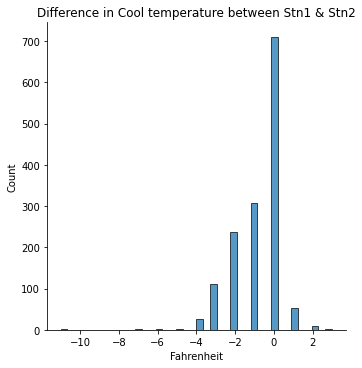

In [ ]:
# compare Cool temperatures between both stations where avilable, i.e. we exclude records where either station recordd 'M' on that given date
stn1_bad_cool_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'Cool'], errors='coerce').isnull(),:].index)
stn2_bad_cool_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'Cool'], errors='coerce').isnull(),:].index)
bad_cool_index_list = np.concatenate((stn1_bad_cool_index_list, stn2_bad_cool_index_list), axis=0)
print('Index list of excluded records:'.format(bad_cool_index_list))

cool_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in bad_cool_index_list],'Cool'].astype('int64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in bad_cool_index_list],'Cool'].astype('int64')

sns.displot(cool_diff)
plt.title('Difference in Cool temperature between Stn1 & Stn2')
plt.xlabel('Fahrenheit')
plt.show()

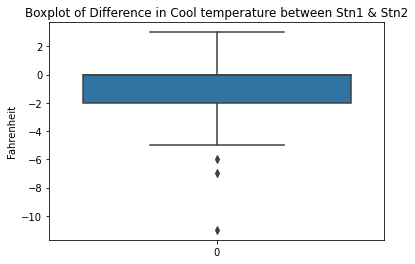

In [ ]:
sns.boxplot(data=cool_diff)
plt.title('Boxplot of Difference in Cool temperature between Stn1 & Stn2')
plt.ylabel('Fahrenheit')
plt.show()

In [ ]:
avg_cool_diff_between_stn1_and_stn2 = np.round(cool_diff.mean(), 1)
avg_cool_diff_between_stn1_and_stn2

-0.8

No significant difference between Cool temperatures of both stations, though stn1 is 0.8 deg F lower than stn2 on average.

We will patch missing Cool values in stn2 with Heat values from stn1, taking into consideration the average difference as calculated above.

In [ ]:
stn1_weather.loc[stn2_bad_heat_index_list, ['Date', 'Cool']]

,Date,Cool
3,2007-05-04,0
252,2008-07-08,13
337,2008-10-01,0
818,2011-07-22,14
1033,2012-08-22,5
1105,2013-05-02,0
1250,2013-09-24,0
1255,2013-09-29,0
1262,2013-10-06,0
1289,2014-05-02,0


In [ ]:
stn2_weather.loc[stn2_bad_cool_index_list, 'Cool'] = np.round(stn1_weather.loc[stn2_bad_heat_index_list, 'Cool'].astype('int64') - avg_cool_diff_between_stn1_and_stn2)
stn2_weather.loc[stn2_bad_cool_index_list, ['Date', 'Cool']]

,Date,Cool
3,2007-05-04,1
252,2008-07-08,14
337,2008-10-01,1
818,2011-07-22,15
1033,2012-08-22,6
1105,2013-05-02,1
1250,2013-09-24,1
1255,2013-09-29,1
1262,2013-10-06,1
1289,2014-05-02,1


In [ ]:
stn1_weather.loc[:,'Cool'] = stn1_weather.loc[:,'Cool'].astype('int64')
stn2_weather.loc[:,'Cool'] = stn2_weather.loc[:,'Cool'].astype('int64')

## Processing `Sunrise` and `Sunset` columns

In [ ]:
sorted_sunrise_timings = stn1_weather.loc[:,'Sunrise'].unique()
sorted_sunrise_timings.sort()
sorted_sunrise_timings

array(['0416', '0417', '0418', '0419', '0420', '0421', '0422', '0423',
       '0424', '0425', '0426', '0427', '0428', '0429', '0430', '0431',
       '0432', '0433', '0434', '0435', '0436', '0437', '0438', '0439',
       '0440', '0441', '0442', '0443', '0444', '0445', '0446', '0447',
       '0448', '0449', '0450', '0451', '0452', '0453', '0454', '0455',
       '0456', '0457', '0458', '0459', '0500', '0501', '0502', '0503',
       '0504', '0505', '0506', '0508', '0509', '0510', '0511', '0512',
       '0513', '0514', '0515', '0516', '0517', '0518', '0519', '0520',
       '0521', '0522', '0523', '0524', '0525', '0526', '0527', '0528',
       '0529', '0530', '0531', '0532', '0533', '0535', '0536', '0537',
       '0538', '0539', '0540', '0541', '0542', '0543', '0544', '0545',
       '0546', '0547', '0548', '0549', '0550', '0552', '0553', '0554',
       '0555', '0556', '0557', '0558', '0559', '0600', '0602', '0603',
       '0604', '0605', '0606', '0607', '0608', '0610', '0611', '0612',
      

In [ ]:
stn1_weather.loc[:,'Sunset'].unique()
sorted_sunset_timings = stn1_weather.loc[:,'Sunset'].unique()
sorted_sunset_timings.sort()
sorted_sunset_timings

array(['1647', '1649', '1650', '1651', '1653', '1654', '1656', '1657',
       '1658', '1660', '1701', '1703', '1704', '1706', '1707', '1709',
       '1711', '1712', '1714', '1715', '1717', '1719', '1720', '1722',
       '1724', '1725', '1727', '1729', '1730', '1732', '1734', '1735',
       '1737', '1739', '1741', '1742', '1744', '1746', '1748', '1749',
       '1751', '1753', '1755', '1756', '1758', '1760', '1803', '1805',
       '1807', '1809', '1810', '1812', '1814', '1815', '1817', '1819',
       '1821', '1822', '1824', '1826', '1827', '1829', '1831', '1832',
       '1834', '1835', '1837', '1839', '1840', '1842', '1843', '1845',
       '1846', '1848', '1849', '1850', '1851', '1852', '1853', '1854',
       '1855', '1856', '1857', '1858', '1859', '1860', '1900', '1901',
       '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909',
       '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917',
       '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925',
      

In [ ]:
stn1_weather.loc[stn1_weather.loc[:,'Sunrise']=='-',:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [ ]:
stn2_weather.loc[stn2_weather.loc[:,'Sunrise']=='-',:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2,2007-05-01,84,52,68,14,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,-3,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,2,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
3,2,2007-05-04,78,51,64,4,42,50,7,1,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
4,2,2007-05-05,66,54,60,5,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2,2014-10-27,79,54,67,16,52,59,0,2,...,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
1468,2,2014-10-28,66,48,57,10,40,48,8,0,...,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
1469,2,2014-10-29,49,40,45,-4,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
1470,2,2014-10-30,53,37,45,-4,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [ ]:
def convert_time_string_to_datetime(row, col):
    #print(row['Date'])
    time_value = datetime.datetime.strptime(row[col], '%H%M')
    #sunset_time_value = datetime.datetime.strptime(row['Sunset'], '%H%M')
    return row['Date'] + datetime.timedelta(hours=time_value.hour, minutes=time_value.minute)
    #row['Sunset'] = row['Date'] + datetime.timedelta(hours=sunset_time_value.hour, minutes=sunset_time_value.minute)

In [ ]:
stn1_weather.loc[:,'Sunrise_datetime'] = stn1_weather.apply(convert_time_string_to_datetime, args=('Sunrise',), axis=1)
stn1_weather.loc[:,['Date', 'Sunrise', 'Sunrise_datetime', 'Sunset']]

,Date,Sunrise,Sunrise_datetime,Sunset
0,2007-05-01,0448,2007-05-01 04:48:00,1849
1,2007-05-02,0447,2007-05-02 04:47:00,1850
2,2007-05-03,0446,2007-05-03 04:46:00,1851
3,2007-05-04,0444,2007-05-04 04:44:00,1852
4,2007-05-05,0443,2007-05-05 04:43:00,1853
...,...,...,...,...
1467,2014-10-27,0618,2014-10-27 06:18:00,1653
1468,2014-10-28,0619,2014-10-28 06:19:00,1651
1469,2014-10-29,0620,2014-10-29 06:20:00,1650
1470,2014-10-30,0622,2014-10-30 06:22:00,1649


In [ ]:
stn1_weather.loc[: ,'Sunset'] = stn1_weather.loc[: ,'Sunset'].replace({'1660': '1700', '1760': '1800', '1860': '1900'})
test_stn1_sunset = stn1_weather.loc[: ,'Sunset'].unique()
test_stn1_sunset.sort()
test_stn1_sunset # sanity check

array(['1647', '1649', '1650', '1651', '1653', '1654', '1656', '1657',
       '1658', '1700', '1701', '1703', '1704', '1706', '1707', '1709',
       '1711', '1712', '1714', '1715', '1717', '1719', '1720', '1722',
       '1724', '1725', '1727', '1729', '1730', '1732', '1734', '1735',
       '1737', '1739', '1741', '1742', '1744', '1746', '1748', '1749',
       '1751', '1753', '1755', '1756', '1758', '1800', '1803', '1805',
       '1807', '1809', '1810', '1812', '1814', '1815', '1817', '1819',
       '1821', '1822', '1824', '1826', '1827', '1829', '1831', '1832',
       '1834', '1835', '1837', '1839', '1840', '1842', '1843', '1845',
       '1846', '1848', '1849', '1850', '1851', '1852', '1853', '1854',
       '1855', '1856', '1857', '1858', '1859', '1900', '1901', '1902',
       '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910',
       '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918',
       '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926',
      

In [ ]:
stn1_weather.loc[:,'Sunset_datetime'] = stn1_weather.apply(convert_time_string_to_datetime, args=('Sunset',), axis=1)
stn1_weather.loc[:,['Date', 'Sunrise', 'Sunrise_datetime','Sunset', 'Sunset_datetime']]

,Date,Sunrise,Sunrise_datetime,Sunset,Sunset_datetime
0,2007-05-01,0448,2007-05-01 04:48:00,1849,2007-05-01 18:49:00
1,2007-05-02,0447,2007-05-02 04:47:00,1850,2007-05-02 18:50:00
2,2007-05-03,0446,2007-05-03 04:46:00,1851,2007-05-03 18:51:00
3,2007-05-04,0444,2007-05-04 04:44:00,1852,2007-05-04 18:52:00
4,2007-05-05,0443,2007-05-05 04:43:00,1853,2007-05-05 18:53:00
...,...,...,...,...,...
1467,2014-10-27,0618,2014-10-27 06:18:00,1653,2014-10-27 16:53:00
1468,2014-10-28,0619,2014-10-28 06:19:00,1651,2014-10-28 16:51:00
1469,2014-10-29,0620,2014-10-29 06:20:00,1650,2014-10-29 16:50:00
1470,2014-10-30,0622,2014-10-30 06:22:00,1649,2014-10-30 16:49:00


In [ ]:
stn2_weather.loc[:,'Sunrise_datetime'] = stn1_weather.loc[:,'Sunrise_datetime'].copy()
stn2_weather.loc[:,'Sunset_datetime'] = stn1_weather.loc[:,'Sunset_datetime'].copy()

In [ ]:
stn1_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           1472 non-null   int64         
 1   Date              1472 non-null   datetime64[ns]
 2   Tmax              1472 non-null   int64         
 3   Tmin              1472 non-null   int64         
 4   Tavg              1472 non-null   int64         
 5   Depart            1472 non-null   int64         
 6   DewPoint          1472 non-null   int64         
 7   WetBulb           1472 non-null   int64         
 8   Heat              1472 non-null   int64         
 9   Cool              1472 non-null   int64         
 10  Sunrise           1472 non-null   object        
 11  Sunset            1472 non-null   object        
 12  CodeSum           1472 non-null   object        
 13  Depth             1472 non-null   object        
 14  Water1            1472 n

In [ ]:
stn2_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           1472 non-null   int64         
 1   Date              1472 non-null   datetime64[ns]
 2   Tmax              1472 non-null   int64         
 3   Tmin              1472 non-null   int64         
 4   Tavg              1472 non-null   int64         
 5   Depart            1472 non-null   int64         
 6   DewPoint          1472 non-null   int64         
 7   WetBulb           1472 non-null   int64         
 8   Heat              1472 non-null   int64         
 9   Cool              1472 non-null   int64         
 10  Sunrise           1472 non-null   object        
 11  Sunset            1472 non-null   object        
 12  CodeSum           1472 non-null   object        
 13  Depth             1472 non-null   object        
 14  Water1            1472 n

## Processing of `Depth`, `Water1` and `SnowFall`

`Water1` for both stations are missing. `Depth` and `SnowFall` are all 0.0 in station-1, and all 'M' in station-2. These 3 columns would be dropped:

In [ ]:
stn1_weather.drop(columns=['Depth','Water1','SnowFall'], inplace=True)
stn2_weather.drop(columns=['Depth','Water1','SnowFall'], inplace=True)

## Checking `PrecipTotal` for abnormal parsing

In [ ]:
# PrecipTotal
stn1_weather.loc[:,'PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

In [ ]:
stn2_weather.loc[:,'PrecipTotal'].unique()

array(['0.00', '  T', '0.02', '0.60', '0.07', '0.11', '0.09', '0.28',
       '0.08', '0.53', '0.21', '0.32', '0.31', '0.27', '0.16', '0.93',
       '0.34', '0.35', 'M', '0.66', '0.24', '0.92', '0.01', '0.89',
       '0.04', '0.97', '0.05', '0.06', '0.46', '0.23', '0.45', '0.83',
       '0.42', '1.33', '0.48', '0.88', '1.96', '0.20', '0.25', '0.67',
       '0.14', '0.17', '0.19', '0.15', '0.03', '0.41', '0.74', '0.71',
       '1.46', '0.26', '0.30', '0.22', '1.31', '0.29', '0.12', '0.43',
       '0.65', '1.22', '0.13', '0.50', '0.59', '2.68', '1.01', '0.62',
       '3.07', '1.75', '0.86', '0.63', '1.03', '0.70', '1.38', '1.14',
       '1.07', '0.87', '0.78', '1.12', '0.10', '0.61', '0.54', '1.19',
       '0.44', '0.33', '0.84', '1.29', '1.05', '1.15', '0.72', '0.40',
       '1.57', '1.30', '0.51', '1.23', '0.77', '3.15', '4.73', '0.52',
       '1.60', '0.57', '0.37', '1.90', '0.18', '0.69', '2.17', '0.36',
       '0.49', '0.39', '0.90', '0.38', '0.56', '0.55', '1.02', '3.66',
       '1.

According to Local Climatological Data (LCD) Dataset Documentation released by NOAA ([Source](ftp://ftp.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf)), definition for *T* is as follows:

*T = trace precipitation amount or snow depth (an amount too small to measure, usually < 0.005 inches water
equivalent) (appears instead of numeric value)*

As such, we will replace *T* with 0.001.

In [ ]:
stn1_weather.loc[:,'PrecipTotal'] = stn1_weather.loc[:,'PrecipTotal'].replace({'  T': '0.001'})
stn2_weather.loc[:,'PrecipTotal'] = stn2_weather.loc[:,'PrecipTotal'].replace({'  T': '0.001'})

[]
[58 59]
Index list of excluded records:


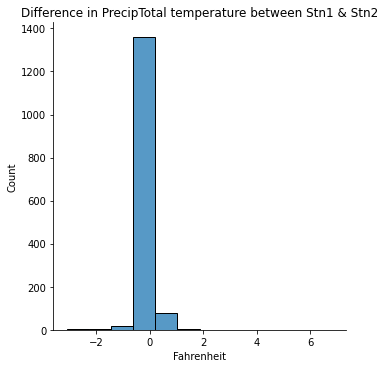

In [ ]:
stn1_bad_PrecipTotal_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'PrecipTotal'], errors='coerce').isnull(),:].index)
stn2_bad_PrecipTotal_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'PrecipTotal'], errors='coerce').isnull(),:].index)
#bad_heat_index_list = np.concatenate((stn1_bad_heat_index_list, stn2_bad_heat_index_list), axis=)
print(stn1_bad_PrecipTotal_index_list)
print(stn2_bad_PrecipTotal_index_list)

bad_PrecipTotal_index_list = np.concatenate((stn1_bad_PrecipTotal_index_list, stn2_bad_PrecipTotal_index_list), axis=0)
print('Index list of excluded records:'.format(bad_PrecipTotal_index_list))

PrecipTotal_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in bad_PrecipTotal_index_list],'PrecipTotal'].astype('float64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in bad_PrecipTotal_index_list],'PrecipTotal'].astype('float64')

sns.displot(PrecipTotal_diff)
plt.title('Difference in PrecipTotal temperature between Stn1 & Stn2')
plt.xlabel('Fahrenheit')
plt.show()

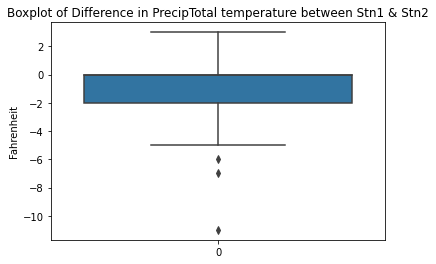

In [ ]:
sns.boxplot(data=cool_diff)
plt.title('Boxplot of Difference in PrecipTotal temperature between Stn1 & Stn2')
plt.ylabel('Fahrenheit')
plt.show()

In [ ]:
avg_PrecipTotal_diff_between_stn1_and_stn2 = np.round(PrecipTotal_diff.mean(), 1)
avg_PrecipTotal_diff_between_stn1_and_stn2

0.0

No significant difference between PrecipTotal values of both stations, with mean difference being 0.0.

We will patch missing PrecipTotal values in station-2 with PrecipTotal values from station-1:

In [ ]:
stn2_weather.loc[stn2_bad_PrecipTotal_index_list,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
58,2,2007-06-28,73,61,67,-5,56,61,0,2,...,-,,M,29.43,30.07,12.2,2,13.3,2007-06-28 04:19:00,2007-06-28 19:31:00
59,2,2007-06-29,71,56,64,-8,56,60,1,0,...,-,,M,29.47,30.11,7.4,2,8.2,2007-06-29 04:19:00,2007-06-29 19:31:00


In [ ]:
stn2_weather.loc[stn2_bad_PrecipTotal_index_list,'PrecipTotal'] = stn1_weather.loc[stn2_bad_PrecipTotal_index_list, 'PrecipTotal'].astype('float64') - avg_PrecipTotal_diff_between_stn1_and_stn2
stn2_weather.loc[stn2_bad_PrecipTotal_index_list,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
58,2,2007-06-28,73,61,67,-5,56,61,0,2,...,-,,0,29.43,30.07,12.2,2,13.3,2007-06-28 04:19:00,2007-06-28 19:31:00
59,2,2007-06-29,71,56,64,-8,56,60,1,0,...,-,,0,29.47,30.11,7.4,2,8.2,2007-06-29 04:19:00,2007-06-29 19:31:00


In [ ]:
stn1_weather.loc[:,'PrecipTotal'] = stn1_weather.loc[:,'PrecipTotal'].astype('float64')
stn2_weather.loc[:,'PrecipTotal'] = stn2_weather.loc[:,'PrecipTotal'].astype('float64')


## Checking 'StnPressure' for abnormal parsing

In [ ]:
stn1_weather.loc[:,'StnPressure'].unique()

array(['29.10', '29.38', '29.39', '29.31', '29.40', '29.57', '29.29',
       '29.21', '29.20', '29.33', '29.49', '29.23', '29.13', '29.55',
       '29.53', '29.34', '29.41', '29.51', '29.36', '29.43', '29.28',
       '29.19', '29.03', '28.82', '29.07', '28.84', '29.18', '29.44',
       '29.30', '29.26', '29.12', '29.24', '29.32', '29.05', '29.11',
       '29.06', '29.22', '29.08', '29.25', '29.37', '29.17', '29.15',
       '29.47', '29.56', '29.46', '29.42', '29.27', '29.50', '29.16',
       '28.59', '28.75', '29.02', '29.79', '29.63', '28.95', '28.79',
       '29.01', '28.97', '28.85', '28.87', '28.93', '28.96', '28.94',
       '29.00', '29.60', '28.90', '28.98', '29.09', '29.35', '29.14',
       '29.04', '29.45', '29.59', '29.54', '29.52', '29.58', '29.48',
       '29.64', '29.65', 'M', '28.89', '28.91', '28.80', '28.73', '28.74',
       '28.55', '28.92', '28.99', '29.61', '28.81', '28.71', '29.62',
       '28.69', '28.83'], dtype=object)

In [ ]:
stn2_weather.loc[:,'StnPressure'].unique()

array(['29.18', '29.44', '29.46', '29.36', '29.62', '29.28', '29.26',
       '29.39', '29.54', '29.55', '29.31', '29.19', '29.60', '29.41',
       '29.47', '29.57', '29.42', '29.49', '29.38', '29.34', '29.25',
       '29.10', '28.87', '28.88', '29.16', '29.13', '28.91', '29.24', 'M',
       '29.33', '29.45', '29.43', '29.56', '29.23', '29.29', '29.12',
       '29.14', '29.35', '29.15', '29.17', '29.11', '29.32', '29.40',
       '29.48', '29.30', '29.21', '29.51', '29.52', '29.27', '29.37',
       '28.67', '28.82', '29.86', '29.70', '29.01', '28.85', '29.08',
       '29.03', '29.20', '28.89', '28.94', '28.98', '29.02', '29.00',
       '29.05', '29.66', '29.09', '28.95', '29.06', '29.22', '29.04',
       '29.65', '29.59', '29.58', '29.61', '29.71', '29.64', '29.53',
       '29.67', '29.50', '29.63', '28.97', '28.80', '29.07', '29.68',
       '28.63', '28.96', '28.79', '28.77'], dtype=object)

Station Pressure has missing values (represented by M) in both stations.

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'StnPressure'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
424,1,2009-06-26,86,69,78,7,60,66,0,13,...,1931,,0.0,M,29.85,6.4,4,8.2,2009-06-26 04:18:00,2009-06-26 19:31:00
1205,1,2013-08-10,81,64,73,0,57,62,0,8,...,1900,,0.0,M,30.08,5.3,5,6.5,2013-08-10 04:54:00,2013-08-10 19:00:00


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'StnPressure'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
43,2,2007-06-13,86,68,77,6,53,62,0,12,...,-,,0.0,M,M,7.0,5,M,2007-06-13 04:16:00,2007-06-13 19:27:00
1205,2,2013-08-10,81,68,75,0,55,63,0,10,...,-,,0.0,M,30.07,6.0,6,7.4,2013-08-10 04:54:00,2013-08-10 19:00:00


[ 424 1205]
[  43 1205]
Index list of excluded records: [ 424 1205   43 1205]


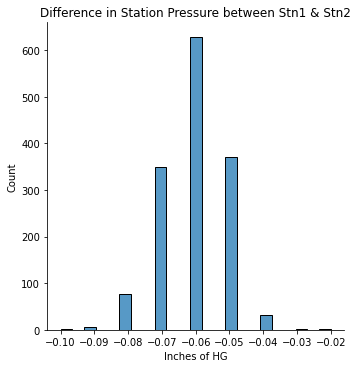

In [ ]:
# compare station pressure between both stations where available, i.e. we exclude records where either station record 'M' on that given date
stn1_stnpressure_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'StnPressure'], errors='coerce').isnull(),:].index)
stn2_stnpressure_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'StnPressure'], errors='coerce').isnull(),:].index)
stnpressure_index_list = np.concatenate((stn1_stnpressure_index_list, stn2_stnpressure_index_list), axis=0)
print(stn1_stnpressure_index_list)
print(stn2_stnpressure_index_list)
print('Index list of excluded records: {}'.format(stnpressure_index_list))
#stnpressure_index_list = [i for i in stnpressure_index_list if i != 1205]
#print('Index list of excluded records: {}'.format(stnpressure_index_list))

stnpressure_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in stnpressure_index_list],'StnPressure'].astype('float64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in stnpressure_index_list],'StnPressure'].astype('float64')

sns.displot(stnpressure_diff)
plt.title('Difference in Station Pressure between Stn1 & Stn2')
plt.xlabel('Inches of HG')
plt.show()

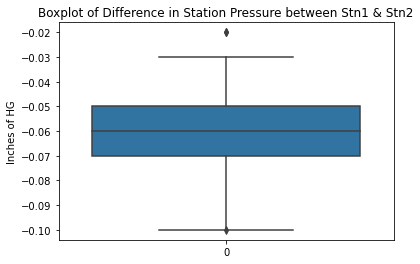

In [ ]:
sns.boxplot(data=stnpressure_diff)
plt.title('Boxplot of Difference in Station Pressure between Stn1 & Stn2')
plt.ylabel('Inches of HG')
plt.show()

In [ ]:
avg_stnpressure_diff_between_stn1_and_stn2 = np.round(stnpressure_diff.mean(), 2)
avg_stnpressure_diff_between_stn1_and_stn2

-0.06

The average difference in station pressure between both stations is 0.06. We will use this figure to compute the missing value, given that the value is missing from only one of the stations. We manually patch #424 in station-1 and #43 in station-2. For #1205 in both stations, we fill with the respective `StnPressure` mean values from both stations.

In [ ]:
stn1_weather.loc[424, 'StnPressure'] = float(stn2_weather.loc[424, 'StnPressure']) + avg_stnpressure_diff_between_stn1_and_stn2
stn2_weather.loc[43, 'StnPressure'] = float(stn1_weather.loc[43, 'StnPressure']) - avg_stnpressure_diff_between_stn1_and_stn2

# get mean for of all stnPressure values, except the 'M' at index 1205, for both stations. Remember float cast before mean operation
stn1_stnPressure_mean = np.mean(stn1_weather.loc[[i for i in stn1_weather.index if i != 1205], 'StnPressure'].astype('float64'))
stn2_stnPressure_mean = np.mean(stn2_weather.loc[[i for i in stn2_weather.index if i != 1205], 'StnPressure'].astype('float64'))

stn1_weather.loc[1205, 'StnPressure'] = np.round(stn1_stnPressure_mean, 2)
stn2_weather.loc[1205, 'StnPressure'] = np.round(stn2_stnPressure_mean, 2)

In [ ]:
stn1_weather.loc[:,'StnPressure'] = stn1_weather.loc[:,'StnPressure'].astype('float64')
stn2_weather.loc[:,'StnPressure'] = stn2_weather.loc[:,'StnPressure'].astype('float64')

## Check `SeaLevel` for abnormal parsing

In [ ]:
# SeaLevel
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'SeaLevel'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
416,1,2009-06-18,80,61,71,1,63,67,0,6,...,1929,RA BR,0.120,29.08,M,6.7,16,7.9,2009-06-18 04:16:00,2009-06-18 19:29:00
497,1,2009-09-07,77,59,68,1,59,62,0,3,...,1817,BR,0.000,29.39,M,5.8,3,4.0,2009-09-07 05:23:00,2009-09-07 18:17:00
866,1,2011-09-08,75,57,66,0,53,59,0,1,...,1815,RA,0.001,29.34,M,13.0,2,13.4,2011-09-08 05:24:00,2011-09-08 18:15:00
878,1,2011-09-20,74,49,62,0,54,58,3,0,...,1753,MIFG BCFG BR,0.000,29.26,M,7.3,18,7.3,2011-09-20 05:37:00,2011-09-20 17:53:00
1045,1,2012-09-03,88,71,80,12,70,73,0,15,...,1824,BR,0.000,29.17,M,4.6,6,4.4,2012-09-03 05:19:00,2012-09-03 18:24:00


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'SeaLevel'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
43,2,2007-06-13,86,68,77,6,53,62,0,12,...,-,,0.000,29.42,M,7.0,5,M,2007-06-13 04:16:00,2007-06-13 19:27:00
872,2,2011-09-14,60,48,54,-11,45,51,11,0,...,-,RA BR HZ FU,0.001,29.47,M,6.0,32,M,2011-09-14 05:30:00,2011-09-14 18:05:00
1033,2,2012-08-22,84,72,78,-1,51,61,0,6,...,-,,0.000,29.39,M,4.7,19,M,2012-08-22 05:06:00,2012-08-22 18:43:00
1371,2,2014-07-23,76,64,70,-7,56,61,0,5,...,-,,0.000,29.47,M,16.4,2,16.7,2014-07-23 04:36:00,2014-07-23 19:20:00


[ 416  497  866  878 1045]
[  43  872 1033 1371]
Index list of excluded records: [ 416  497  866  878 1045   43  872 1033 1371]


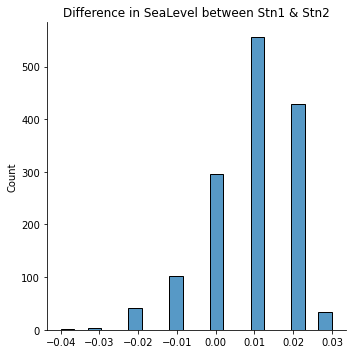

In [ ]:
# compare station pressure between both stations where available, i.e. we exclude records where either station record 'M' on that given date
stn1_SeaLevel_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'SeaLevel'], errors='coerce').isnull(),:].index)
stn2_SeaLevel_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'SeaLevel'], errors='coerce').isnull(),:].index)
SeaLevel_index_list = np.concatenate((stn1_SeaLevel_index_list, stn2_SeaLevel_index_list), axis=0)
print(stn1_SeaLevel_index_list)
print(stn2_SeaLevel_index_list)
print('Index list of excluded records: {}'.format(SeaLevel_index_list))
#stnpressure_index_list = [i for i in stnpressure_index_list if i != 1205]
#print('Index list of excluded records: {}'.format(stnpressure_index_list))

SeaLevel_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in SeaLevel_index_list],'SeaLevel'].astype('float64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in SeaLevel_index_list],'SeaLevel'].astype('float64')

sns.displot(SeaLevel_diff)
plt.title('Difference in SeaLevel between Stn1 & Stn2')
plt.xlabel('')
plt.show()

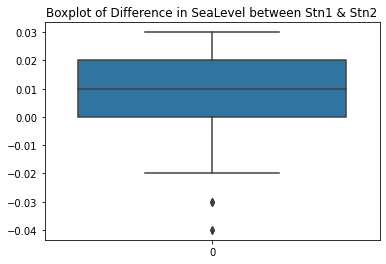

In [ ]:
sns.boxplot(data=SeaLevel_diff)
plt.title('Boxplot of Difference in SeaLevel between Stn1 & Stn2')
plt.ylabel('')
plt.show()

In [ ]:
avg_SeaLevel_diff_between_stn1_and_stn2 = np.round(SeaLevel_diff.mean(), 2)
avg_SeaLevel_diff_between_stn1_and_stn2

0.01

In [ ]:
stn1_SeaLevel_index_list

array([ 416,  497,  866,  878, 1045])

In [ ]:
stn1_weather.loc[stn1_SeaLevel_index_list,'SeaLevel'] = np.round(stn2_weather.loc[stn1_SeaLevel_index_list, 'SeaLevel'].astype('float64') + avg_SeaLevel_diff_between_stn1_and_stn2, 2)
stn1_weather.loc[stn1_SeaLevel_index_list, :]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
416,1,2009-06-18,80,61,71,1,63,67,0,6,...,1929,RA BR,0.120,29.08,29.8,6.7,16,7.9,2009-06-18 04:16:00,2009-06-18 19:29:00
497,1,2009-09-07,77,59,68,1,59,62,0,3,...,1817,BR,0.000,29.39,30.1,5.8,3,4.0,2009-09-07 05:23:00,2009-09-07 18:17:00
866,1,2011-09-08,75,57,66,0,53,59,0,1,...,1815,RA,0.001,29.34,30.04,13.0,2,13.4,2011-09-08 05:24:00,2011-09-08 18:15:00
878,1,2011-09-20,74,49,62,0,54,58,3,0,...,1753,MIFG BCFG BR,0.000,29.26,30,7.3,18,7.3,2011-09-20 05:37:00,2011-09-20 17:53:00
1045,1,2012-09-03,88,71,80,12,70,73,0,15,...,1824,BR,0.000,29.17,29.88,4.6,6,4.4,2012-09-03 05:19:00,2012-09-03 18:24:00


In [ ]:
stn1_weather.loc[stn2_SeaLevel_index_list, 'SeaLevel'].astype('float64')

43      30.09
872     30.09
1033    30.07
1371    30.12
Name: SeaLevel, dtype: float64

In [ ]:
stn2_weather.loc[stn2_SeaLevel_index_list,'SeaLevel'] = np.round(stn1_weather.loc[stn2_SeaLevel_index_list, 'SeaLevel'].astype('float64') - avg_SeaLevel_diff_between_stn1_and_stn2, 2)
stn2_weather.loc[stn2_SeaLevel_index_list,:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
43,2,2007-06-13,86,68,77,6,53,62,0,12,...,-,,0.000,29.42,30.08,7.0,5,M,2007-06-13 04:16:00,2007-06-13 19:27:00
872,2,2011-09-14,60,48,54,-11,45,51,11,0,...,-,RA BR HZ FU,0.001,29.47,30.08,6.0,32,M,2011-09-14 05:30:00,2011-09-14 18:05:00
1033,2,2012-08-22,84,72,78,-1,51,61,0,6,...,-,,0.000,29.39,30.06,4.7,19,M,2012-08-22 05:06:00,2012-08-22 18:43:00
1371,2,2014-07-23,76,64,70,-7,56,61,0,5,...,-,,0.000,29.47,30.11,16.4,2,16.7,2014-07-23 04:36:00,2014-07-23 19:20:00


In [ ]:
stn1_weather.loc[:, 'SeaLevel'] = stn1_weather.loc[:, 'SeaLevel'].astype('float64')
stn2_weather.loc[:, 'SeaLevel'] = stn2_weather.loc[:, 'SeaLevel'].astype('float64')

## Check on `ResultSpeed` column

`ResultSpeed` and `ResultDir` columns are already in numerical type for both stations.

In [ ]:
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'ResultSpeed'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime


In [ ]:
stn1_weather.loc[pd.to_numeric(stn2_weather.loc[:,'ResultSpeed'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime


In [ ]:
stn1_weather.loc[:,'ResultSpeed'].unique()

array([ 1.7, 13. , 11.7, 10.4, 14.4,  8.6,  2.7,  3.9,  0.7, 11.3, 12.4,
        6.6, 16.9,  8.1,  7.8, 10.5,  5.4, 11.1,  6.3, 10. , 11.4, 14.9,
        4.9,  2.8,  8.9,  4.8,  5.8, 10.3,  9.3,  4.2,  6.5,  5.2, 10.8,
       22.7, 10.9,  0.3,  8.3,  7.2,  5.6,  4.1, 14. , 10.7,  3.5,  7.6,
        7. ,  6.1,  7.5, 11.9,  5.9,  6.7,  4.6,  6.4,  3.2,  8.4, 12.9,
        8.8,  9.4,  1.4,  2.1,  4.4,  9.1,  3.1,  3. ,  3.8,  3.3,  5.5,
        5.7,  1.6,  6.2,  2.5,  4.5,  3.4,  3.6,  6. ,  0.5,  5.3,  9.6,
        9. ,  2. ,  9.2,  1.8, 12.1,  6.8,  5. ,  2.6,  7.9,  4.3,  2.3,
        9.5,  6.9,  7.7, 11.5, 15.1, 17.2, 16.2, 18. , 13.3, 13.9, 10.2,
       12.2, 10.6, 13.8, 14.5,  5.1, 15.5,  7.3,  7.4, 19.2,  8.2,  1.9,
       21.1, 12.5, 16.1,  7.1,  2.9,  8. ,  8.7, 11.6,  8.5,  4. , 12.7,
        9.8,  1. , 11.2, 12. , 13.7,  3.7,  4.7, 11. ,  0.2, 13.5,  1.2,
        2.4, 13.2,  9.9,  1.3,  1.5,  0.1,  0.6, 20.3, 15.6,  9.7,  2.2,
       15. ,  0.8, 14.1, 14.7, 15.3, 14.2, 17.4, 16

In [ ]:
stn2_weather.loc[:,'ResultSpeed'].unique()

array([ 2.7, 13.3, 12.9, 10.1, 11.2, 13.8,  8.5,  2.5,  3.9,  2. , 11.7,
       12.7,  6.4, 14.1,  8.1,  8. ,  3.4, 11.1,  8.6,  6.3, 10.9,  4.5,
        8.2,  4.7,  5.8,  9.7,  8.9,  7.5,  4.9,  7.9,  6.2,  9.6, 20.3,
        9.3,  2.4,  4.6,  6.6,  9.4,  7. ,  5.9,  3.8,  2.1,  4. , 12.2,
        3.7,  6.5,  7.3,  5.6,  7.4,  5.1,  9.5,  3.1,  4.3,  3.3, 12.6,
        4.8,  9.1, 10. ,  8.4,  1.2, 10.3,  7.7, 11.3,  1.9,  2.9,  1.1,
        7.2, 10.6,  2.6,  1.5,  3. ,  6.9,  3.5,  6.1,  5.5,  6.7,  7.8,
        5.3, 10.8,  4.4,  2.2, 12.8, 12.1,  7.1, 12.5,  9.8,  6.8, 14.4,
       14.6,  2.8,  3.6,  5.7, 15.5, 17.7, 16.7, 16. , 14.5,  4.2, 11.9,
       14.3,  6. , 13.7,  8.3,  1.6, 10.5, 10.4, 18. ,  1.7,  5.2, 13.2,
       19.2, 11.8, 14.8,  8.7, 10.2,  5. , 13.6,  8.8,  5.4,  2.3,  3.2,
       12. , 17.5, 13.4,  9.9,  9.2, 11. , 12.3, 10.7,  1.8,  1. ,  0.3,
        1.4,  0.8,  4.1,  7.6, 19.8,  0.6, 15.7, 13. ,  9. ,  0.5, 16.2,
        0.7, 20.8, 14.9, 15.3, 17. , 18.8, 13.9, 13

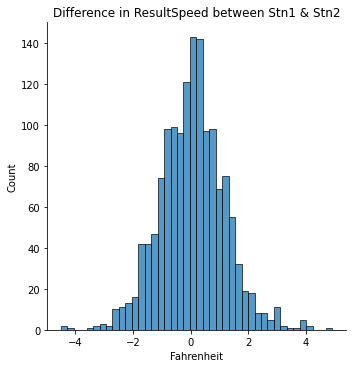

In [ ]:
resultSpeed_diff = stn1_weather.loc[:,'ResultSpeed'] - stn2_weather.loc[:,'ResultSpeed']

sns.displot(resultSpeed_diff)
plt.title('Difference in ResultSpeed between Stn1 & Stn2')
plt.xlabel('Fahrenheit')
plt.show()

In [ ]:
avg_resultSpeed_diff = np.mean(stn1_weather.loc[:,'ResultSpeed'] - stn2_weather.loc[:,'ResultSpeed'])
avg_resultSpeed_diff

0.052853260869565225

Average difference in resultant wind speed at both stations are very close to zero, with no missing values spotted. There would be no action carried out on `ResultSpeed` in terms of cleaning.

## Check on `ResultDir` column

In [ ]:
# ResultDir
stn1_weather.loc[:,'ResultDir'].unique()

array([27,  4,  7,  8, 11, 18,  9, 17,  3, 14, 21, 36, 25, 24, 19,  5, 26,
       10, 22, 31, 20, 28, 33,  6, 12,  2, 23, 30, 29,  1, 16, 32, 13, 35,
       34, 15])

In [ ]:
stn2_weather.loc[:,'ResultDir'].unique()

array([25,  2,  6,  7, 10, 17,  8,  9, 36,  1, 11, 21, 22, 23,  3, 16, 18,
       20,  5, 15, 24, 30, 19, 26, 29, 28, 12,  4, 33, 13, 27, 31, 32, 35,
       14, 34])

No missing or non-numeric values found in `ResultDir`, hence no further action carried out on this column for both stations in terms of data cleaning.

## Check `AvgSpeed` for abnormal parsing

In [ ]:
# AvgSpeed
stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'AvgSpeed'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime


In [ ]:
stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'AvgSpeed'], errors='coerce').isnull(),:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
43,2,2007-06-13,86,68,77,6,53,62,0,12,...,-,,0.000,29.42,30.08,7.0,5,M,2007-06-13 04:16:00,2007-06-13 19:27:00
872,2,2011-09-14,60,48,54,-11,45,51,11,0,...,-,RA BR HZ FU,0.001,29.47,30.08,6.0,32,M,2011-09-14 05:30:00,2011-09-14 18:05:00
1033,2,2012-08-22,84,72,78,-1,51,61,0,6,...,-,,0.000,29.39,30.06,4.7,19,M,2012-08-22 05:06:00,2012-08-22 18:43:00


[]
[  43  872 1033]
Index list of excluded records:


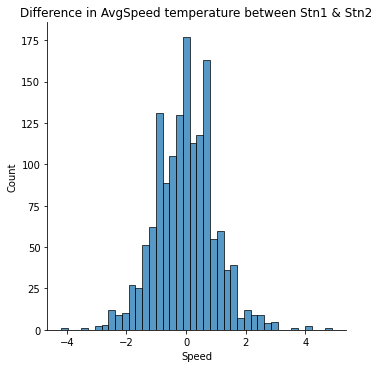

In [ ]:
stn1_bad_AvgSpeed_index_list = np.array(stn1_weather.loc[pd.to_numeric(stn1_weather.loc[:,'AvgSpeed'], errors='coerce').isnull(),:].index)
stn2_bad_AvgSpeed_index_list = np.array(stn2_weather.loc[pd.to_numeric(stn2_weather.loc[:,'AvgSpeed'], errors='coerce').isnull(),:].index)
#bad_heat_index_list = np.concatenate((stn1_bad_heat_index_list, stn2_bad_heat_index_list), axis=0)
print(stn1_bad_AvgSpeed_index_list)
print(stn2_bad_AvgSpeed_index_list)

bad_AvgSpeed_index_list = np.concatenate((stn1_bad_AvgSpeed_index_list, stn2_bad_AvgSpeed_index_list), axis=0)
print('Index list of excluded records:'.format(bad_AvgSpeed_index_list))

AvgSpeed_diff = stn1_weather.loc[[i for i in stn1_weather.index if i not in bad_AvgSpeed_index_list],'AvgSpeed'].astype('float64') - stn2_weather.loc[[i for i in stn2_weather.index if i not in bad_AvgSpeed_index_list],'AvgSpeed'].astype('float64')

sns.displot(AvgSpeed_diff)
plt.title('Difference in AvgSpeed temperature between Stn1 & Stn2')
plt.xlabel('Speed')
plt.show()

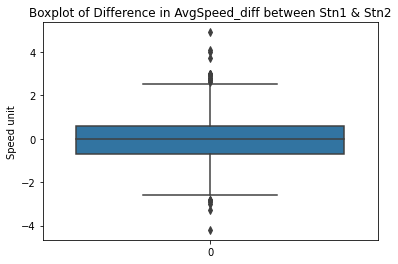

In [ ]:
sns.boxplot(data=AvgSpeed_diff)
plt.title('Boxplot of Difference in AvgSpeed_diff between Stn1 & Stn2')
plt.ylabel('Speed unit')
plt.show()

In [ ]:
avg_AvgSpeed_diff = np.mean(AvgSpeed_diff)
avg_AvgSpeed_diff

-0.01660993873383255

In [ ]:
stn2_weather.loc[stn2_bad_AvgSpeed_index_list, 'AvgSpeed'] = np.round(stn1_weather.loc[stn2_bad_AvgSpeed_index_list, 'AvgSpeed'].astype('float64') - avg_AvgSpeed_diff, 1)
stn2_weather.loc[stn2_bad_AvgSpeed_index_list, ['Date', 'AvgSpeed']]

,Date,AvgSpeed
43,2007-06-13,8.6
872,2011-09-14,7.3
1033,2012-08-22,5.8


In [ ]:
stn1_weather.loc[stn2_bad_AvgSpeed_index_list, ['Date', 'AvgSpeed']]

,Date,AvgSpeed
43,2007-06-13,8.6
872,2011-09-14,7.3
1033,2012-08-22,5.8


In [ ]:
stn1_weather.loc[:, 'AvgSpeed'] = stn1_weather.loc[:, 'AvgSpeed'].astype('float64')
stn2_weather.loc[:, 'AvgSpeed'] = stn2_weather.loc[:, 'AvgSpeed'].astype('float64')

3 records with *M* in station-2 have been patched from station-1, with minor average difference accounted for. Column successfully converted to float64.

## Processing `CodeSum`

First we inspect the domain of values that is present in the `CodeSum` column of both stations:

In [ ]:
stn1_weather.loc[:,'CodeSum'].unique()

array([' ', 'BR', 'RA', 'BR HZ', 'RA BR', 'RA VCTS', 'RA HZ',
       'TSRA RA BR HZ', 'HZ', 'TSRA BR HZ', 'TSRA RA BR', 'TSRA RA HZ',
       'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU', 'BR HZ FU',
       'TSRA RA VCTS', 'HZ VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'RA BR HZ', 'TSRA RA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA', 'TS TSRA RA BR VCTS',
       'TS RA', 'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TSRA RA FG+ FG BR', 'TSRA DZ FG+ FG BR HZ', 'TS TSRA',
       'TSRA HZ', 'TS', 'FG+ BR HZ', 'TS TSRA BR HZ', 'DZ BR HZ',
       'TS TSRA BR', 'RA BR FU', 'TS BR HZ', 'FG+ BR', 'FG+ MIFG BR',
       'TSRA RA FG BR', 'DZ', 'RA DZ BR HZ', 'TS BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'RA BR SQ', 'RA FG BR', 'RA BR HZ FU',
       'MIFG BCFG BR', 'TSRA RA FG+ FG BR HZ', 'TSRA DZ BR HZ',
       'TS TSRA RA FG BR HZ', 'RA DZ FG+ BR', 'TSRA FG+ BR HZ',
       'FG+ FG BR HZ', 'FG BR HZ', 'TS RA BR HZ', 'BC

In [ ]:
stn2_weather.loc[:,'CodeSum'].unique()

array([' ', 'BR HZ', 'HZ', 'TSRA RA BR', 'RA BR', 'TSRA RA', 'RA HZ',
       'TSRA BR HZ', 'RA BR HZ VCTS', 'RA', 'TSRA RA HZ', 'TSRA RA HZ FU',
       'BR', 'TSRA HZ', 'VCTS', 'TS TSRA RA BR HZ VCTS', 'TS TSRA BR HZ',
       'RA BR HZ', 'TSRA RA BR VCTS', 'TSRA RA DZ BR HZ', 'TSRA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA BR HZ', 'TS TSRA BR',
       'TSRA RA BR HZ', 'RA BCFG BR', 'TSRA BR', 'RA DZ', 'RA DZ BR',
       'TS TSRA RA HZ', 'TS BR', 'RA BR SQ', 'TS TSRA RA', 'TS RA',
       'TSRA RA VCTS', 'TSRA RA BR HZ VCTS', 'BR VCTS', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR', 'DZ BR HZ', 'DZ', 'FG+ FG BR', 'FG+ BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG BR HZ',
       'TS TSRA RA FG BR', 'TS BR HZ', 'BR HZ VCFG', 'TSRA RA FG+ BR',
       'TS TSRA RA VCTS', 'FU', 'TS', 'TS TSRA VCFG', 'TS TSRA HZ',
       'TS TSRA GR RA BR', 'HZ FU', 'RA BR HZ FU', 'FG+ BCFG BR',
       'TSRA RA FG+ FG BR', 'FG+', 'TSRA BR SQ', 'RA BR HZ VCFG',
       'RA FG+ BR', 'FG BR HZ', 

`CodeSum` is a multi-value column, i.e. if there are multiple weather effects on a given day, each of them would be recorded with a code, and space-separated.

In [ ]:
print(stn1_weather.loc[stn1_weather.loc[:,'CodeSum']==' ', :].shape)
print(stn2_weather.loc[stn2_weather.loc[:,'CodeSum']==' ', :].shape)

(805, 21)
(804, 21)


Generally over 800 days with no weather effect recorded at both stations.

First we fill these no-weather-effect records with another nominal value *A_EMPTY*:

In [ ]:
stn1_weather.loc[:,'CodeSum'] = stn1_weather.loc[:,'CodeSum'].replace({' ': 'A_EMPTY'})
stn2_weather.loc[:,'CodeSum'] = stn2_weather.loc[:,'CodeSum'].replace({' ': 'A_EMPTY'})

`CodeSum` feature is best dealt with when data from both stations are combined together, so we proceed to merge them first:

In [ ]:
stn1_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           1472 non-null   int64         
 1   Date              1472 non-null   datetime64[ns]
 2   Tmax              1472 non-null   int64         
 3   Tmin              1472 non-null   int64         
 4   Tavg              1472 non-null   int64         
 5   Depart            1472 non-null   int64         
 6   DewPoint          1472 non-null   int64         
 7   WetBulb           1472 non-null   int64         
 8   Heat              1472 non-null   int64         
 9   Cool              1472 non-null   int64         
 10  Sunrise           1472 non-null   object        
 11  Sunset            1472 non-null   object        
 12  CodeSum           1472 non-null   object        
 13  PrecipTotal       1472 non-null   float64       
 14  StnPressure       1472 n

In [ ]:
stn2_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           1472 non-null   int64         
 1   Date              1472 non-null   datetime64[ns]
 2   Tmax              1472 non-null   int64         
 3   Tmin              1472 non-null   int64         
 4   Tavg              1472 non-null   int64         
 5   Depart            1472 non-null   int64         
 6   DewPoint          1472 non-null   int64         
 7   WetBulb           1472 non-null   int64         
 8   Heat              1472 non-null   int64         
 9   Cool              1472 non-null   int64         
 10  Sunrise           1472 non-null   object        
 11  Sunset            1472 non-null   object        
 12  CodeSum           1472 non-null   object        
 13  PrecipTotal       1472 non-null   float64       
 14  StnPressure       1472 n

In [ ]:
cleaned_weather = pd.concat([stn1_weather, stn2_weather]).reset_index(drop=True)
cleaned_weather.sort_values(by=['Date','Station'])
cleaned_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           2944 non-null   int64         
 1   Date              2944 non-null   datetime64[ns]
 2   Tmax              2944 non-null   int64         
 3   Tmin              2944 non-null   int64         
 4   Tavg              2944 non-null   int64         
 5   Depart            2944 non-null   int64         
 6   DewPoint          2944 non-null   int64         
 7   WetBulb           2944 non-null   int64         
 8   Heat              2944 non-null   int64         
 9   Cool              2944 non-null   int64         
 10  Sunrise           2944 non-null   object        
 11  Sunset            2944 non-null   object        
 12  CodeSum           2944 non-null   object        
 13  PrecipTotal       2944 non-null   float64       
 14  StnPressure       2944 n

In [ ]:
cleaned_weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1849,A_EMPTY,0.0,29.10,29.82,1.7,27,9.2,2007-05-01 04:48:00,2007-05-01 18:49:00
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1850,BR,0.0,29.38,30.09,13.0,4,13.4,2007-05-02 04:47:00,2007-05-02 18:50:00
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,1851,A_EMPTY,0.0,29.39,30.12,11.7,7,11.9,2007-05-03 04:46:00,2007-05-03 18:51:00


In [ ]:
cleaned_weather.tail(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_datetime,Sunset_datetime
2941,2,2014-10-29,49,40,45,-4,34,42,20,0,...,-,A_EMPTY,0.000,29.42,30.07,8.5,29,9.0,2014-10-29 06:20:00,2014-10-29 16:50:00
2942,2,2014-10-30,53,37,45,-4,35,42,20,0,...,-,RA,0.001,29.41,30.10,5.9,23,6.5,2014-10-30 06:22:00,2014-10-30 16:49:00
2943,2,2014-10-31,49,34,42,-6,29,36,23,0,...,-,RA SN BR,0.040,29.54,30.20,21.7,34,22.6,2014-10-31 06:23:00,2014-10-31 16:47:00


In [ ]:
# dummify with single-space as a separator
cleaned_weather_dummified_codeSum = cleaned_weather.loc[:,'CodeSum'].str.get_dummies(sep=' ')

# drop A_EMPTY
cleaned_weather_dummified_codeSum.drop(columns=['A_EMPTY'], inplace=True)

# build new column names
codeSum_new_col_list = ['CodeSum_'+c for c in cleaned_weather_dummified_codeSum.columns]

# rename columns
cleaned_weather_dummified_codeSum.columns = codeSum_new_col_list

# check first 5 rows
cleaned_weather_dummified_codeSum.head(5)

,CodeSum_BCFG,CodeSum_BR,CodeSum_DZ,CodeSum_FG,CodeSum_FG+,CodeSum_FU,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cleaned_weather_dummified_codeSum.loc[ \
    (cleaned_weather_dummified_codeSum.loc[:,'CodeSum_RA']==1) & \
    (cleaned_weather_dummified_codeSum.loc[:,'CodeSum_BCFG']==1) & \
    (cleaned_weather_dummified_codeSum.loc[:,'CodeSum_BR']==1),:]

,CodeSum_BCFG,CodeSum_BR,CodeSum_DZ,CodeSum_FG,CodeSum_FG+,CodeSum_FU,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
153,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1621,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
cleaned_weather.loc[[153, 1621], 'CodeSum']

153     RA DZ FG+ BCFG BR
1621           RA BCFG BR
Name: CodeSum, dtype: object

In [ ]:
# concat column wise. will burse into flames if you attempt row-wise!
cleaned_weather_final = pd.concat([cleaned_weather, cleaned_weather_dummified_codeSum], axis=1)
cleaned_weather_final.drop(columns=['CodeSum','Sunrise','Sunset'], inplace=True)
cleaned_weather_final.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0


# Save the cleaned and finalized weather dataset

In [ ]:
cleaned_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           2944 non-null   int64         
 1   Date              2944 non-null   datetime64[ns]
 2   Tmax              2944 non-null   int64         
 3   Tmin              2944 non-null   int64         
 4   Tavg              2944 non-null   int64         
 5   Depart            2944 non-null   int64         
 6   DewPoint          2944 non-null   int64         
 7   WetBulb           2944 non-null   int64         
 8   Heat              2944 non-null   int64         
 9   Cool              2944 non-null   int64         
 10  PrecipTotal       2944 non-null   float64       
 11  StnPressure       2944 non-null   float64       
 12  SeaLevel          2944 non-null   float64       
 13  ResultSpeed       2944 non-null   float64       
 14  ResultDir         2944 n

In [ ]:
cleaned_weather_final.describe()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,...,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,...,2944.00000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,67.239470,1.954484,53.457880,59.318614,3.417799,5.645041,0.131348,...,0.00034,0.089334,0.001019,0.317595,0.002038,0.001019,0.034647,0.103601,0.001359,0.006454
std,0.500085,11.461970,10.381939,10.539316,6.839947,10.675181,9.283161,5.955153,6.104205,0.393172,...,0.01843,0.285274,0.031911,0.465620,0.045106,0.031911,0.182914,0.304793,0.036842,0.080090
min,1.000000,41.000000,29.000000,36.000000,-17.000000,22.000000,32.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,69.000000,50.000000,60.000000,-3.000000,46.000000,53.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,78.000000,59.000000,69.000000,2.000000,54.000000,61.000000,0.000000,4.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,85.000000,66.000000,75.000000,7.000000,62.000000,67.000000,5.000000,10.000000,0.060000,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,104.000000,83.000000,94.000000,23.000000,75.000000,78.000000,29.000000,29.000000,6.860000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cleaned_weather_final.to_csv('../assets/weather_cleaned.csv', index = False)

# Exploratory Data Analysis

The weather_cleaned CSV provides weather data from two stations for the years 2007-2014 (covering the months May-October).

In [ ]:
weather_cleaned = pd.read_csv('../assets/weather_cleaned.csv')
weather_cleaned.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
0,1,2007-05-01 00:00:00,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2007-05-02 00:00:00,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-03 00:00:00,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2007-05-04 00:00:00,66,49,58,4,41,50,7,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2007-05-05 00:00:00,66,53,60,5,38,49,5,0,...,0,0,0,0,0,0,0,0,0,0


We will explore the weather data for one year at this stage of investigation and perform EDA on the combined dataset to gather deeper insights. We choose 2013 as that is the year with the highest incidence of the WNV.

In [ ]:
#Converting relevant columns to datetime
weather_cleaned['Date'] = pd.to_datetime(weather_cleaned['Date'])
weather_cleaned['Sunrise_datetime'] = pd.to_datetime(weather_cleaned['Sunrise_datetime'])
weather_cleaned['Sunset_datetime'] = pd.to_datetime(weather_cleaned['Sunset_datetime'])
weather_cleaned.dtypes

Station                      int64
Date                datetime64[ns]
Tmax                         int64
Tmin                         int64
Tavg                         int64
Depart                       int64
DewPoint                     int64
WetBulb                      int64
Heat                         int64
Cool                         int64
PrecipTotal                float64
StnPressure                float64
SeaLevel                   float64
ResultSpeed                float64
ResultDir                    int64
AvgSpeed                   float64
Sunrise_datetime    datetime64[ns]
Sunset_datetime     datetime64[ns]
CodeSum_BCFG                 int64
CodeSum_BR                   int64
CodeSum_DZ                   int64
CodeSum_FG                   int64
CodeSum_FG+                  int64
CodeSum_FU                   int64
CodeSum_GR                   int64
CodeSum_HZ                   int64
CodeSum_MIFG                 int64
CodeSum_RA                   int64
CodeSum_SN          

In [ ]:
#Storing weather data from 2013 as a separate dataframe for ease of exploratory analysis
weather_cleaned_2013 = weather_cleaned[weather_cleaned.Date.dt.year == 2013]
weather_cleaned_2013.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,CodeSum_SN,CodeSum_SQ,CodeSum_TS,CodeSum_TSRA,CodeSum_VCFG,CodeSum_VCTS
1104,1,2013-05-01,84,56,70,17,54,62,0,5,...,0,0,0,0,0,0,0,0,0,0
1105,1,2013-05-02,55,42,49,-5,41,45,16,0,...,0,0,0,1,0,0,0,0,0,0
1106,1,2013-05-03,48,40,44,-10,42,43,21,0,...,0,0,0,1,0,0,0,0,0,0
1107,1,2013-05-04,71,48,60,6,45,51,5,0,...,0,0,0,0,0,0,0,0,0,0
1108,1,2013-05-05,69,48,59,4,43,50,6,0,...,0,0,0,1,0,0,0,0,0,0


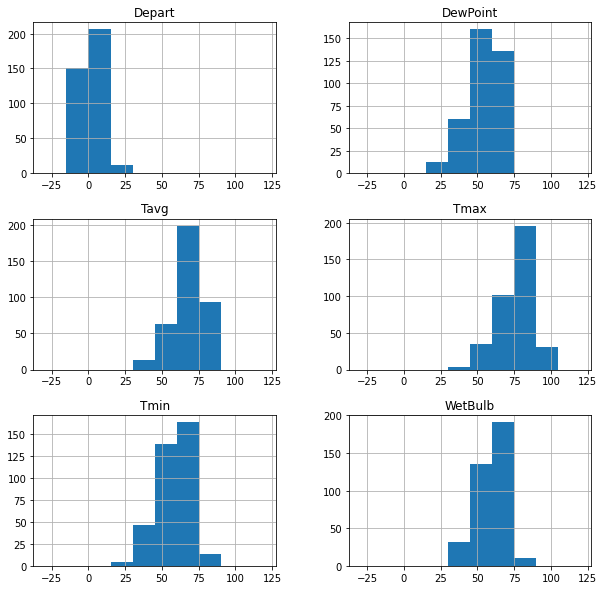

In [ ]:
#Examining distribution of temperature variables
weather_temperature = ['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb']
weather_cleaned_2013[weather_temperature].hist(figsize = (10, 10));

Depart is right-skewed suggesting generally low departure from the average temperature. The remaining variables, DewPoint, Tavg, Tmax, Tmin and WetBulb are more normally distributed. 

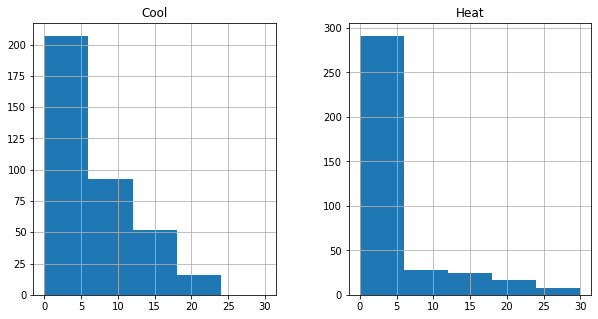

In [ ]:
#Examining distribution of degree day variables
weather_degree_days = ['Heat', 'Cool']
weather_cleaned_2013[weather_degree_days].hist(figsize = (10, 5));

Both the Heat and Cool columns are right-skewed. However, there appears to be more variability within the degree coolness.

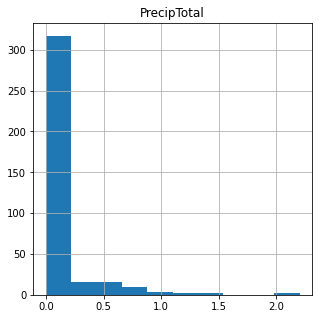

In [ ]:
#Examining distribution of precipitation
weather_precipitation = ['PrecipTotal']
weather_cleaned_2013[weather_precipitation].hist(figsize = (5, 5));

The heavily right-skewed distribution suggests that precipation has largely been low in 2013.

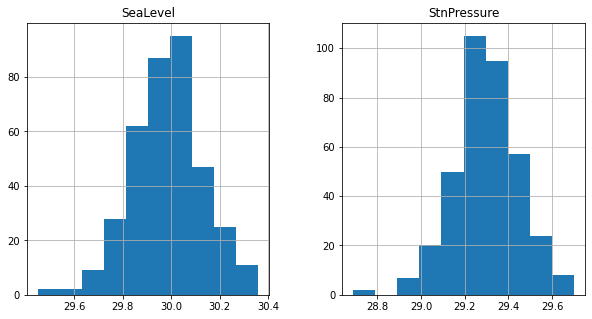

In [ ]:
#Examining distribution of pressure variables
weather_pressure = ['StnPressure', 'SeaLevel']
weather_cleaned_2013[weather_pressure].hist(figsize = (10, 5));

StnPressure and Sea Level appear to be somewhat normally distributed.

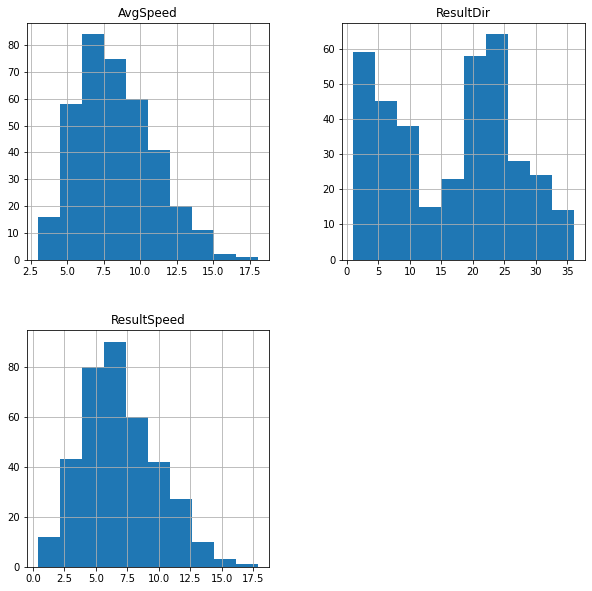

In [ ]:
#Examining distribution of wind variables
weather_wind = ['ResultSpeed', 'ResultDir', 'AvgSpeed']
weather_cleaned_2013[weather_wind].hist(figsize = (10, 10));

In terms of the wind-related variables, AvgSpeed and ResultSpeed seem to be somewhat normally distributed but there is some variability in the distribution of the ResultDir. 

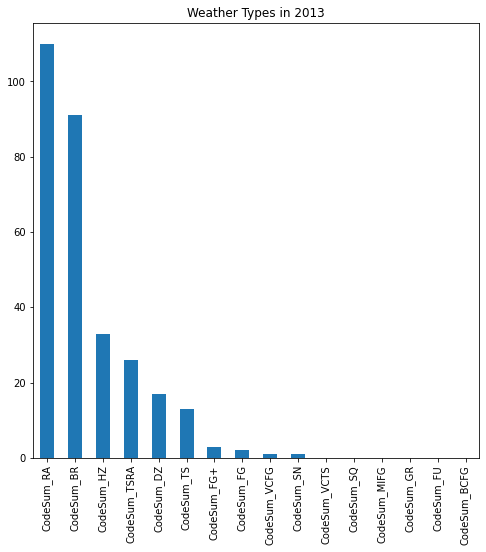

In [ ]:
#Examining occurence of significant weather types
codesum_cols = weather_cleaned_2013.columns[weather_cleaned_2013.columns.str.contains('CodeSum')]
plt.figure(figsize=(8,8))
plt.title('Weather Types in 2013')
weather_cleaned_2013[codesum_cols].sum().sort_values(ascending=False).plot(kind='bar');

During May-October 2013, rainfall (RA) and mist (BR) were recorded over 80 times. We also observed over 20 occurences of thunderstorm rainfall (TSRA) and haze (HZ).

# Conclusion

Findings for cleaning weather data as follows:

1) No duplicate dates for both stations

2) First date and last date for both stations are the same.

3) There are gaps in the date-range of both stations, i.e. weather info not collected at certain times of the year.

4) `Tavg` investigation revealed no problem with station-1, but 11 records in station-2 with 'M' value. Patched 11 Tavg records in station-2 by taking the mean of Tmax and Tmin, then rounding the result. After patching, Tavg in both stations successfully converted to *int64*.

5) `Depart` investigation revealed no problem with station-1, but all (1472) records in station-2 with 'M' value. 30-year average temperature for both stations are assumed to be very similar, so `Depart` values from station-1 were copied over to `Depart` column in station 2.

6) `WetBulb` investigation revealed 3 'M' values in station-1, but 1 'M' value in station-2. Average difference between stn1 and stn2 is 0.5 deg F, i.e. stn2 wetbulb is 0.5 def F higher than stn1 on average. Histogram and boxplot analysis of differences in web-bulb temps between 2 stations reveal that they are very close to being the same, so we patch missing values of 1 station with value from the othe station, with average difference included in calculation. Fortunately, there were no instances where wet-bulb temps were missing from both stations on a same day.

7) `Heat` investigation revealed no problem with station-1, but 11 'M' values in station-2. No significant diff, though station-1 is 0.4 deg F higher than station-2. Bad records in station-2 patched in same manner as `Wetbulb`.

8) `Cool` investigation revealed no problem with station-1, but 11 'M' values in station-2. No significant diff, though station-1 is 0.8 deg F lower than station-2. Bad records in station-2 patched in same manner as `Wetbulb`.

9) Station-1 sunrise timings have no abnormalities, but sunset timings have weird values like 1660, 1760, and 1860, so replaced them with 1700, 1800, 1900 respectively. Used helper function to create 2 new columns `Sunrise_datetime` and `Sunset_datetime` for station-1, then replicated both new columns over to station-2.

10) `Depth`, `Water1` and `SnowFall` displayed almost no variation, so they were dropped from datasets of both stations.

11) For `PrecipTotal`, trace precipitation amount *T* was replaced with 0.001, justified by definition found in NOAA document.  After replacement, station-1 `PrecipTotal` values had no more problems while station-2 had 2 values marked as 'M'. Mean difference is 0.0, so missing values in station-2 were filled with values from station-1. Both columns converted to float64.

12) `StnPressure` investigation revealed 2 missing values for both stations. The average difference in station pressure between both stations is 0.06. We manually patch #424 in station-1 and #43 in station-2. For #1205 in both stations, we fill with the respective `StnPressure` mean values from both stations.

13) For `SeaLevel`, there were 5 missing values in station-1 and 4 missing values in station-2. No significant difference, though station-1 is 0.01 Hg higher than station-2. Bad records at both sides were patched in same manner as `Wetbulb`.

14) For `AvgSpeed`, there were 3 missing values in station-2. No significant difference, station-2 was 0.02 mph higher than station-1. Bad records in station-2 where patched in same manner as `Wetbulb`.

15) `CodeSum` was one-hot encoded, and dummified columns where synchronized across both stations.